# Introduction

This notebook shows how object detection can be done on your own dataset by training YOLOv2. I am going to use soccer playing images as training dataset as an example to detect soccer ball and goal post. After finishing this notebook, you will be able to train your own model, and detect objects that you are interested in.

It is really your choice which implementation to use. I happened to choose [darkflow](https://github.com/thtrieu/darkflow) which has been quite popular for Tensorflow support on Github open source hosting service. However, you can build the YOLO model on your own since the [official web-site](https://pjreddie.com/darknet/yolo/) provides its pre-trained weights as an external file.

Here is another choice of implementation called, [tensornets](https://github.com/taehoonlee/tensornets). Please check it out.

## Data Preparation

1. Search for your interest
2. Collect media files (image, video)
3. If your media file is video, make a lot of screenshot
  - Here is how to take a bulk screenshot [LINK](https://pibby.livejournal.com/164326.html)
4. Make annotations with drawing rectangles 
  - Here is a tool to do it [LINK](https://github.com/tzutalin/labelImg)

## Importing Dependencies

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Making Your Own Configuration File (cfg)

## Specifying Classes of Your Interest

## Downloading Pre-trained Weights

## Defining Model Options

In [41]:
options = {"model": "cfg/yolo_custom.cfg", 
           "load": "bin/yolo.weights",
           "batch": 8,
           "epoch": 150,
           "gpu": 1.0,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/",
           "savepb": True}

In [42]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo_custom.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.014955759048461914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,

## Training the Model

In [43]:
tfnet.train()


cfg/yolo_custom.cfg parsing ./annotations/
Parsing for ['ball', 'goal post'] 
[====================>]100%  scene02501.xml
Statistics:
ball: 64
goal post: 73
Dataset size: 85
Dataset of 85 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 8
	Epoch number  : 150
	Backup every  : 2000
step 1 - loss 243.05087280273438 - moving ave loss 243.05087280273438
step 2 - loss 241.30819702148438 - moving ave loss 242.8766052246094
step 3 - loss 238.8910369873047 - moving ave loss 242.47804840087895
step 4 - loss 237.67510986328125 - moving ave loss 241.99775454711917
step 5 - loss 236.656005859375 - moving ave loss 241.46357967834476
step 6 - loss 235.68836975097656 - moving ave loss 240.88605868560796
step 7 - loss 234.1415252685547 - moving ave loss 240.21160534390265
step 8 - loss 231.91456604003906 - moving ave loss 239.38190141351632
step 9 - loss 232.19680786132812 - moving ave loss 238.6633920582975
step 10 - loss 230.42755126953125 - moving ave loss 237.839807979420

## Loading from the Latest Checkpoint

In [4]:
options = {"model": "cfg/yolo_custom.cfg",
           "load": -1,
           "gpu": 1.0
          }

In [5]:
tfnet2 = TFNet(options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Init  |

In [6]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_custom-1500
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom-1500


## Predicting on a Image

In [56]:
import pprint as pp

original_img = cv2.imread("./sample_img/scene01101.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)

[{'bottomright': {'x': 987, 'y': 346},
  'confidence': 0.101503186,
  'label': 'ball',
  'topleft': {'x': 971, 'y': 326}},
 {'bottomright': {'x': 982, 'y': 337},
  'confidence': 0.63676643,
  'label': 'ball',
  'topleft': {'x': 951, 'y': 314}},
 {'bottomright': {'x': 1006, 'y': 348},
  'confidence': 0.15234321,
  'label': 'ball',
  'topleft': {'x': 954, 'y': 310}},
 {'bottomright': {'x': 1078, 'y': 359},
  'confidence': 0.12065965,
  'label': 'ball',
  'topleft': {'x': 868, 'y': 294}}]


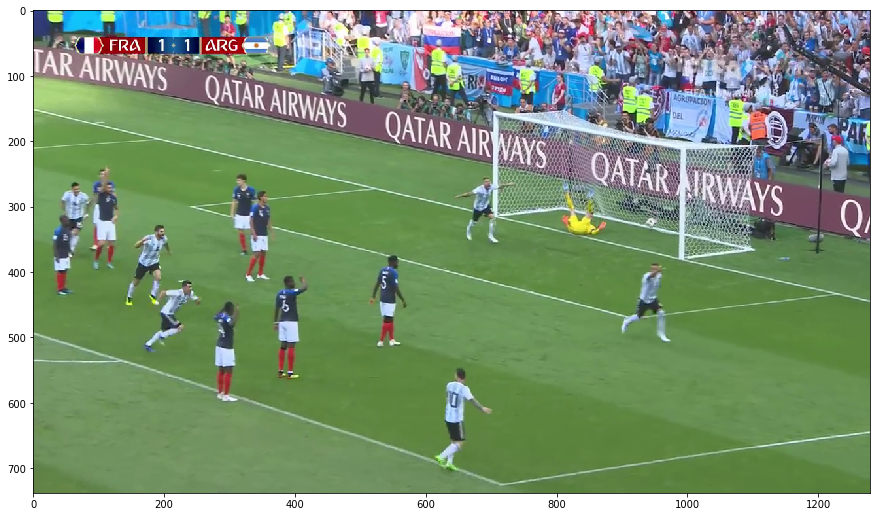

In [57]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [10]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

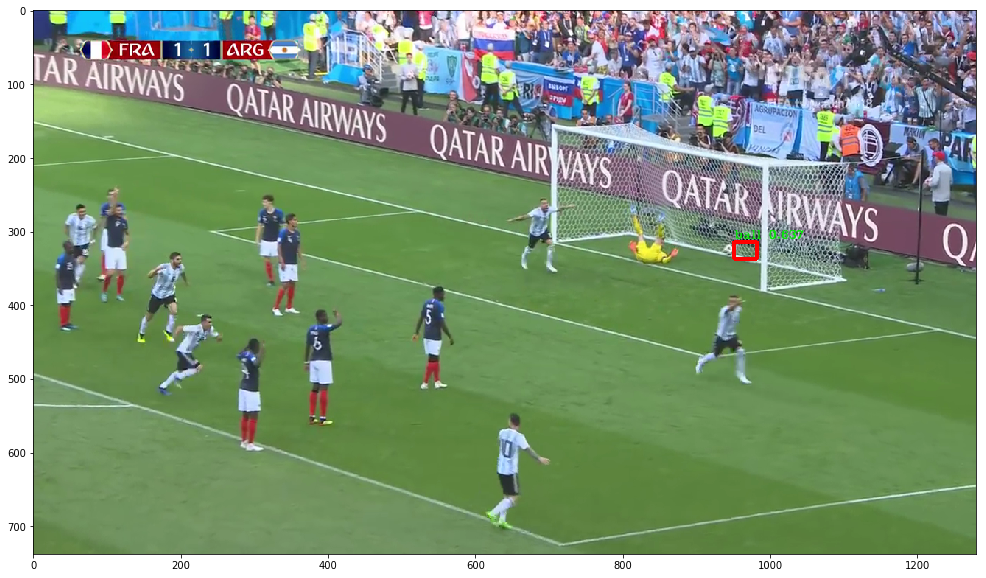

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

## Predicting on a Video

In [13]:
cap = cv2.VideoCapture('./sample_video/test_video.avi')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_video/output.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()